## 확률의 개념과 응용

## 제1장

* 주사위 눈금별 상대도수에 대한 히스토그램 : 주사위를 반복수행하면 눈금별로 1/6에 수렴한다.
* sample(1：6, n, replace=TRUE )은 1에서 6까지 수에서 n개의 표본을 반복하여(replace) 뽑는 것을 의미

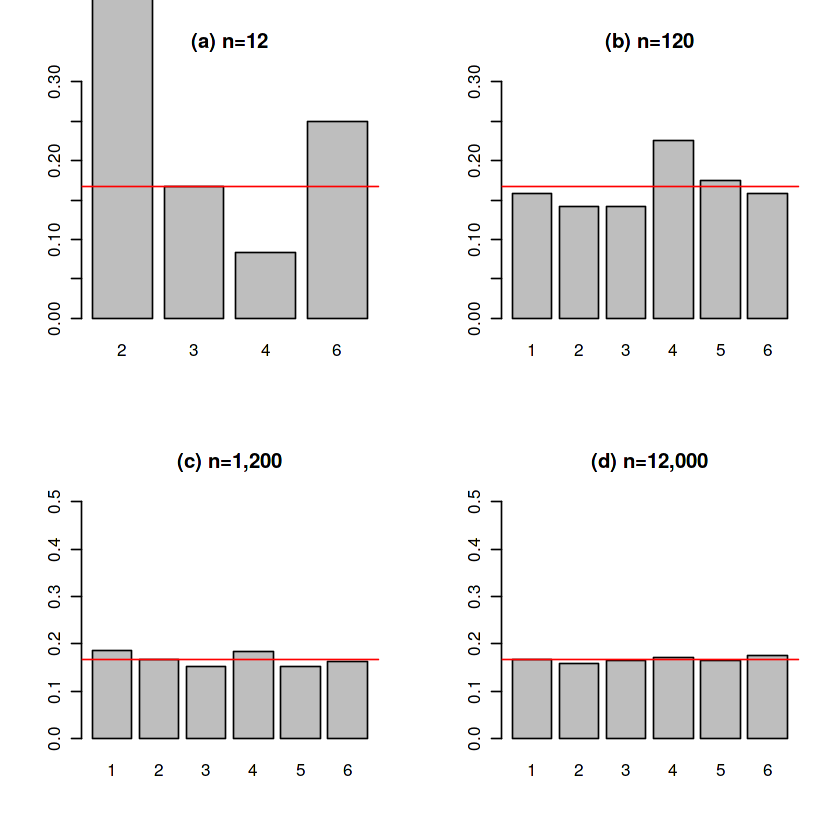

In [1]:
par(mfrow=c(2,2))

dice12 = sample(1:6, 12, replace = TRUE)
 barplot(table(dice12)/12, ylim=c(0,0.3), main="(a) n=12")
 abline(b=0, a=1/6, col=2)
dice120 = sample(1:6, 120, replace = TRUE)
 barplot(table(dice120)/120, ylim=c(0,0.3), main="(b) n=120")
 abline(b=0, a=1/6, col=2)
dice1200 = sample(1:6, 1200, replace = TRUE)
 barplot(table(dice1200)/1200, ylim=c(0,0.5), main="(c) n=1,200")
 abline(b=0, a=1/6, col=2)
dice12000 = sample(1:6, 12000, replace = TRUE)
 barplot(table(dice12000)/12000, ylim=c(0,0.5), main="(d) n=12,000")
 abline(b=0, a=1/6, col=2)

## 제2장

In [2]:
#install.packages("prob")
library(prob)

Loading required package: combinat


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn


Loading required package: fAsianOptions

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics

Loading required package: fOptions


Attaching package: ‘prob’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [3]:
# 동전 1회 던지기
t1 = tosscoin(1)
print(t1)
# 동전 3회 던지기
t3 = tosscoin(3)
print(t3)

  toss1
1     H
2     T
  toss1 toss2 toss3
1     H     H     H
2     T     H     H
3     H     T     H
4     T     T     H
5     H     H     T
6     T     H     T
7     H     T     T
8     T     T     T


In [4]:
#주사위 1회 던지기
r1 = rolldie(1)
print(r1)

  X1
1  1
2  2
3  3
4  4
5  5
6  6


In [5]:
# 순서 고려, 복원추출
u1 = urnsamples(x=c("a","b","c"), size=2, replace=TRUE, ordered=TRUE)
print(" 순서 고려, 복원추출  ")
print(u1)

# 순서 고려, 비복원추출
u2 = urnsamples(x=c("a","b","c"), size=2, replace=FALSE, ordered=TRUE)
print(" 순서 고려, 비복원추출  ")
print(u2)

# 순서 비고려, 비복원추출
u3 = urnsamples(x=c("a","b","c"), size=2, replace=FALSE, ordered=FALSE)
print(" 순서 비고려, 비복원추출  ")
print(u3)

[1] " 순서 고려, 복원추출  "
  X1 X2
1  a  a
2  b  a
3  c  a
4  a  b
5  b  b
6  c  b
7  a  c
8  b  c
9  c  c
[1] " 순서 고려, 비복원추출  "
  X1 X2
1  a  b
2  b  a
3  a  c
4  c  a
5  b  c
6  c  b
[1] " 순서 비고려, 비복원추출  "
  X1 X2
1  a  b
2  a  c
3  b  c


In [6]:
# 순서 고려, 복원추출
a1 = nsamp(n=3, k=2, replace=TRUE, ordered=TRUE)
# 순서 고려, 비복원추출
a2 = nsamp(n=3, k=2, replace=FALSE, ordered=TRUE)

cat("  순서 고려, 복원추출의 경우의 수   :", a1, "\n")
cat("  순서 고려, 비복원추출의 경우의 수 :", a2)

  순서 고려, 복원추출의 경우의 수   : 9 
  순서 고려, 비복원추출의 경우의 수 : 6

In [7]:
#주사위 확률계산
rolldie(1, makespace=TRUE)

X1,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


In [8]:
#동전던지기 확률계산
tosscoin(1, makespace=TRUE)

toss1,probs
<fct>,<dbl>
H,0.5
T,0.5


In [9]:
S=rolldie(1, makespace=TRUE)
A=subset(S, X1==2 | X1==4 | X1==6)
B=subset(S, X1==3 | X1==6)
pa = Prob(A)
pb = Prob(B)
paub = Prob(union(A,B))
pacb = Prob(intersect(A,B))
padb = Prob(setdiff(A,B))

cat(" P(A) =", pa, "\n")
cat(" P(B) =", pb, "\n")
cat(" P(A U B) =", paub, "\n")
cat(" P(A ^ B) =", pacb, "\n")
cat(" P(A - B) =", padb)

 P(A) = 0.5 
 P(B) = 0.3333333 
 P(A U B) = 0.6666667 
 P(A ^ B) = 0.1666667 
 P(A - B) = 0.3333333

## 제3장

In [10]:
#표본공간, 사건의 지정
S = rolldie(1, makespace=TRUE)
A = subset(S, X1%in%c(2,4,6))
B = subset(S, X1%in%c(3,6))

In [11]:
#조건부 확률
pab = Prob(A, given=B)
pba = Prob(B, given=A)
pab1 = Prob(intersect(A,B))/Prob(B)

cat(" P(A|B) =", pab, "\n")
cat(" P(B|A) =", pba, "\n")
cat(" P(A|B) =", pab1, "\n")

 P(A|B) = 0.5 
 P(B|A) = 0.3333333 
 P(A|B) = 0.5 


## 제4장

In [12]:
library(distrEx)

Loading required package: distr

Loading required package: startupmsg

Utilities for Start-Up Messages (version 0.9.6)

For more information see ?"startupmsg", NEWS("startupmsg")


Loading required package: sfsmisc

Object Oriented Implementation of Distributions (version 2.8.0)

Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".

For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").



Attaching package: ‘distr’


The following object is masked from ‘package:prob’:

    prob


The following object is masked from ‘package:fAsianOptions’:

    igamma


The following objects are m

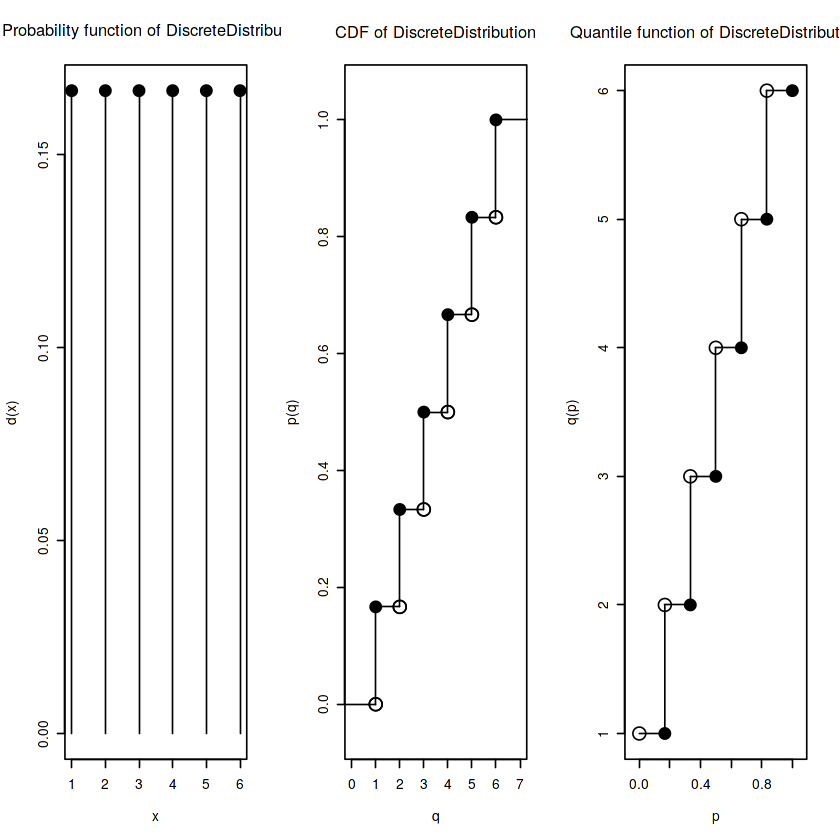

In [13]:
# 주사위 던지기의 분포
X =  DiscreteDistribution ( supp = c(1:6),  prob = rep(1/6,6) )
plot(X)

In [14]:
# 기댓값과 분산(X=주사위던지기 눈금)
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")
cat(" sd(X)     = ", sd(X), "\n")
cat(" E(2*X+5)  = ", E(2*X+5), "\n")
cat(" var(2*X+5)= ", var(2*X+5), "\n")
cat(" sd(2*X+5) = ", sd(2*X+5))

 E(X)      =  3.5 
 var(X)    =  2.916667 
 sd(X)     =  1.707825 
 E(2*X+5)  =  12 
 var(2*X+5)=  11.66667 
 sd(2*X+5) =  3.41565

## 제5장

In [15]:
library(distrEx)

### 1. 초기하분포

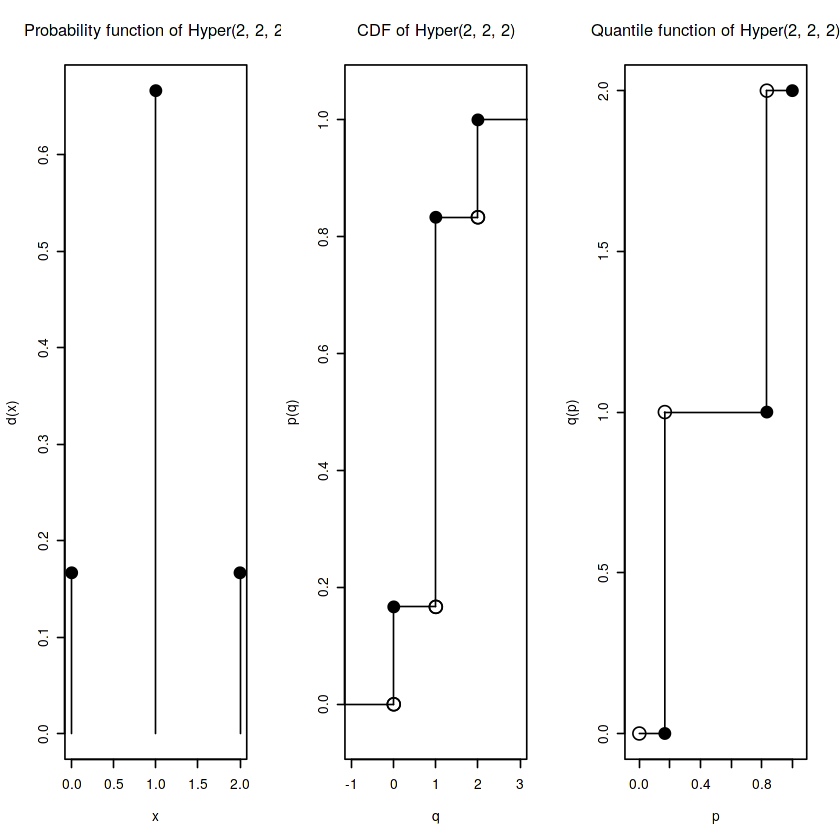

In [16]:
X = Hyper(2,2,2)
plot(X)

In [17]:
# 초기하분포의 확률질량함수값
d(X)(0:2)

# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

[1] 0.1666667 0.6666667 0.1666667

 E(X)      =  1 
 var(X)    =  0.3333333 


### 2. 이항분포

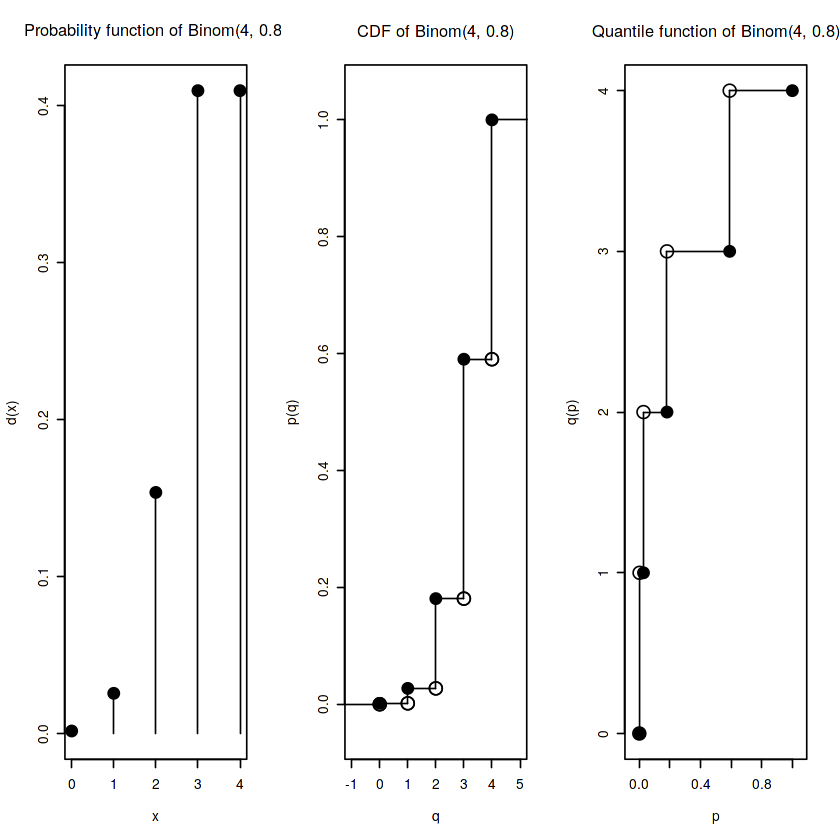

In [18]:
# 이항분포를 이용한 확률계산
X=Binom(4,0.8)
plot(X)

In [19]:
d(X)(2)
# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

[1] 0.1536

 E(X)      =  3.2 
 var(X)    =  0.64 


### 3. 포아송분포

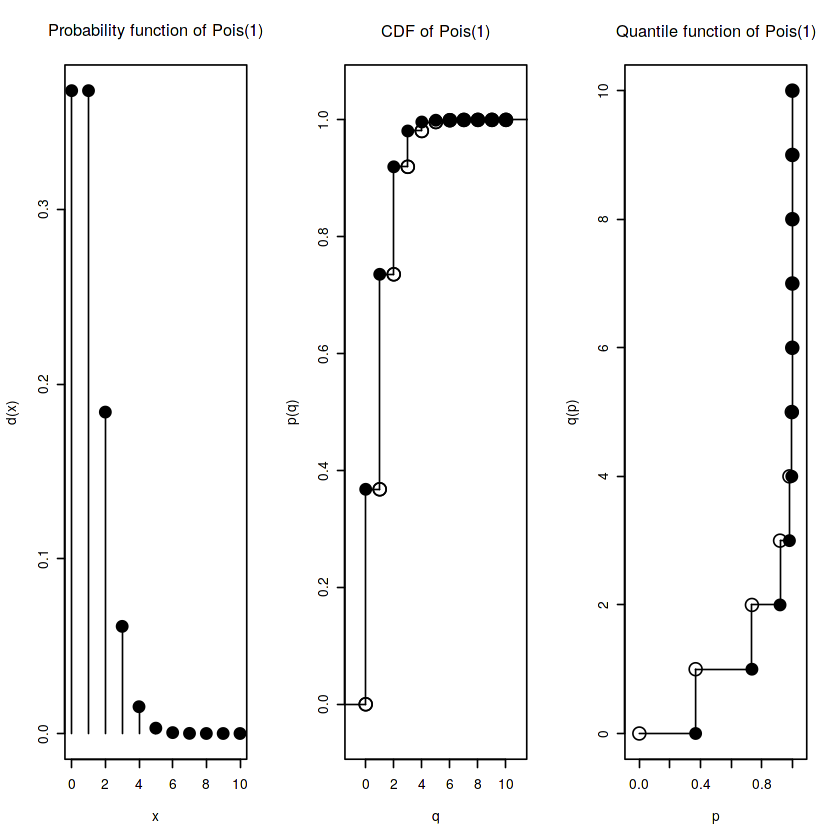

In [20]:
X=Pois(1)
plot(X)

In [21]:
# 포아송 분포를 이용한 확률계산
1-p(X)(2)

# 이항 분포를 이용한 확률계산
X1=Binom(10000,0.0001)
1-p(X1)(2)

[1] 0.0803014

[1] 0.0802922

In [22]:
# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

 E(X)      =  1 
 var(X)    =  1 


## 제6장

In [23]:
library(distrEx)

### 1. 연속형 균등분포

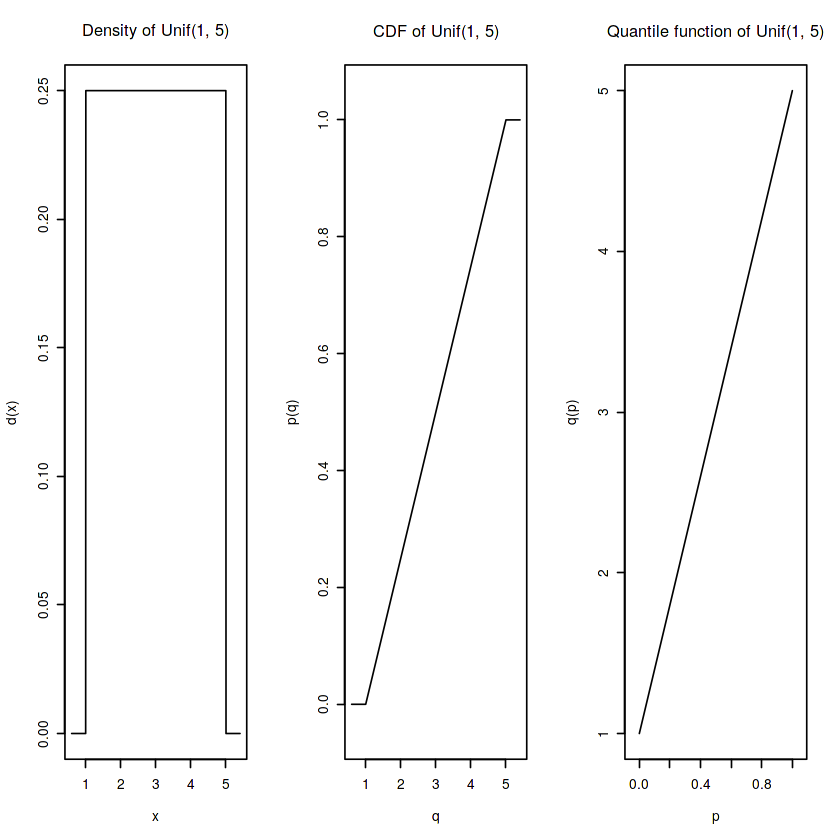

In [24]:
X = Unif(1,5)
plot(X)

In [25]:
# 확률 계산 : P(X>2)
1-p(X)(2)
# 확률 계산 : P(2<=X<4)
p(X)(4) - p(X)(2)

[1] 0.75

[1] 0.5

In [26]:
# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

 E(X)      =  3 
 var(X)    =  1.333333 


### 2. 지수분포

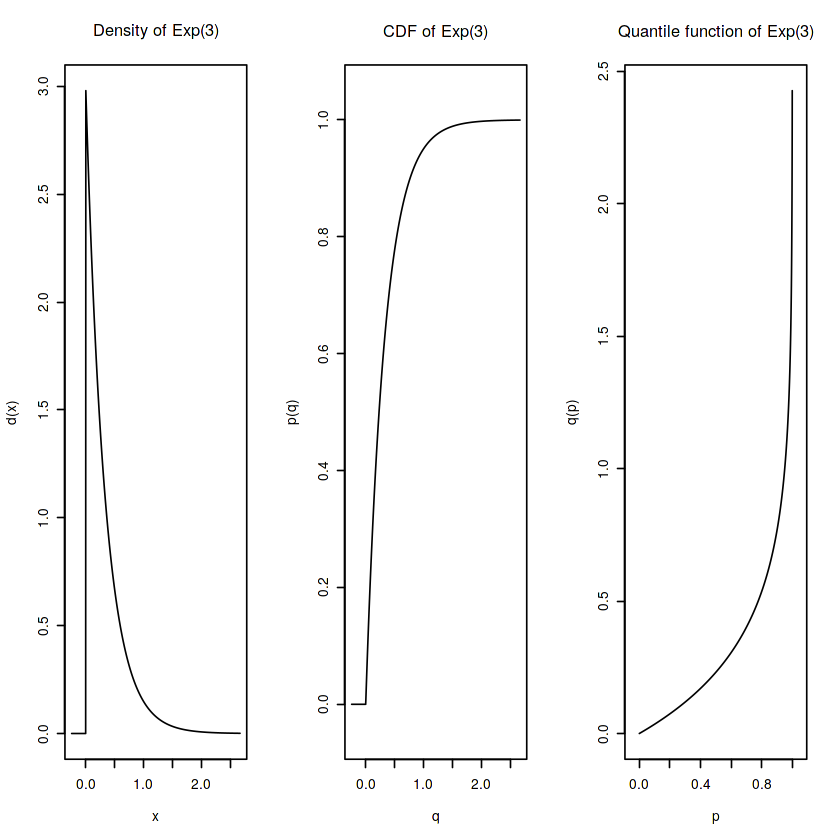

In [27]:
X = Exp(3)
plot(X)

In [28]:
# 확률계산 : P(X<1)
 p(X)(1)

[1] 0.9502129

In [29]:
# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

 E(X)      =  0.3333333 
 var(X)    =  0.1111111 


### 3. 정규분포

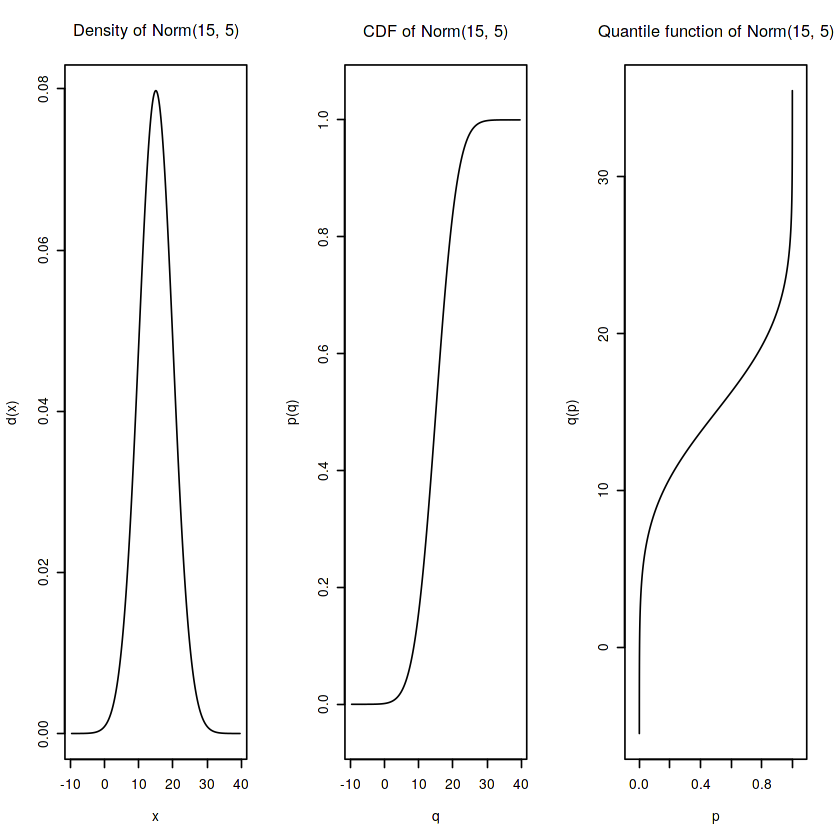

In [30]:
X = Norm(15,5)
plot(X)

In [31]:
# 확률계산 : P(X<25)
p(X)(25)

[1] 0.9772499

In [32]:
# 기댓값과 분산
cat(" E(X)      = ", E(X), "\n")
cat(" var(X)    = ", var(X), "\n")

 E(X)      =  15 
 var(X)    =  25 


## 제7장

In [33]:
library(mvtnorm)

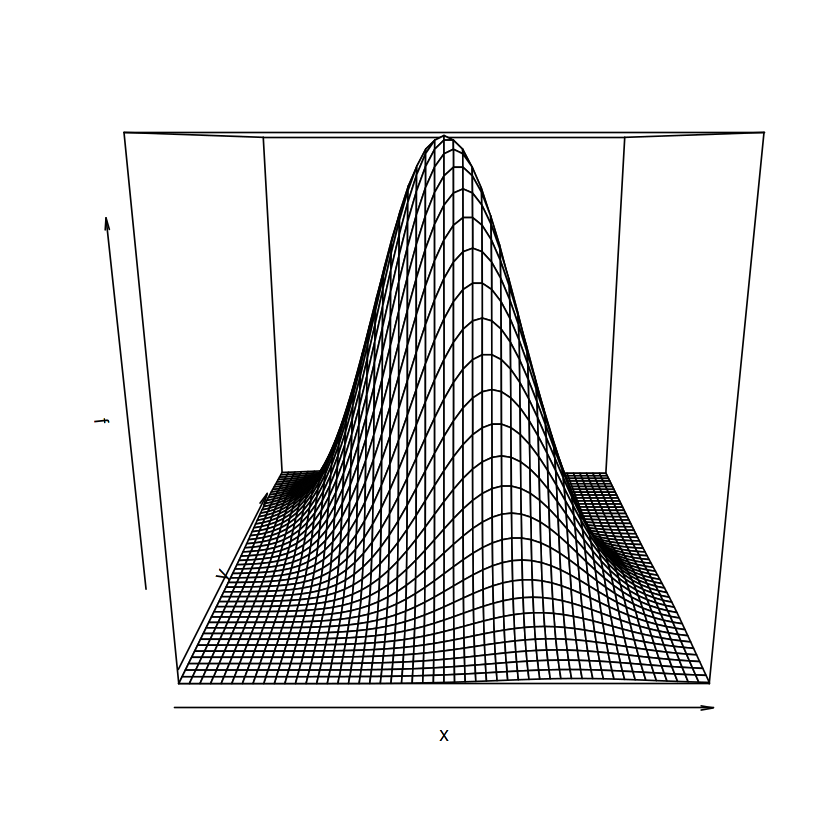

In [34]:
x = seq(0,6, length=51)
y = seq(-1,11, length=51)
f = matrix(0, nrow=length(x), ncol=length(y))
m = c(3,5)
S = matrix(c(1,-1,-1,4), nrow=2, ncol=2)
# 결합확률밀도함수의 계산
 for (i in 1:length(x)) 
   for (j in 1:length(y))
      f[i,j] = dmvnorm(c(x[i], y[j]), mean=m, sigma=S)

# 3차원 그림 그리기
persp(x, y, f)

In [35]:
# 다항분포의 확률 계산
dmultinom(c(3,5,2), size=10, prob=c(0.25,0.5,0.25))

# 다항분포에서 난수 생성
rmultinom(n=5, size=10, prob=c(0.25,0.5,0.25))

[1] 0.0769043

1,2,3,2,3
7,7,6,5,3
2,1,1,3,4


## 제8장

In [36]:
library(TeachingDemos)

### 1. 이항분포의 정규분포 근사

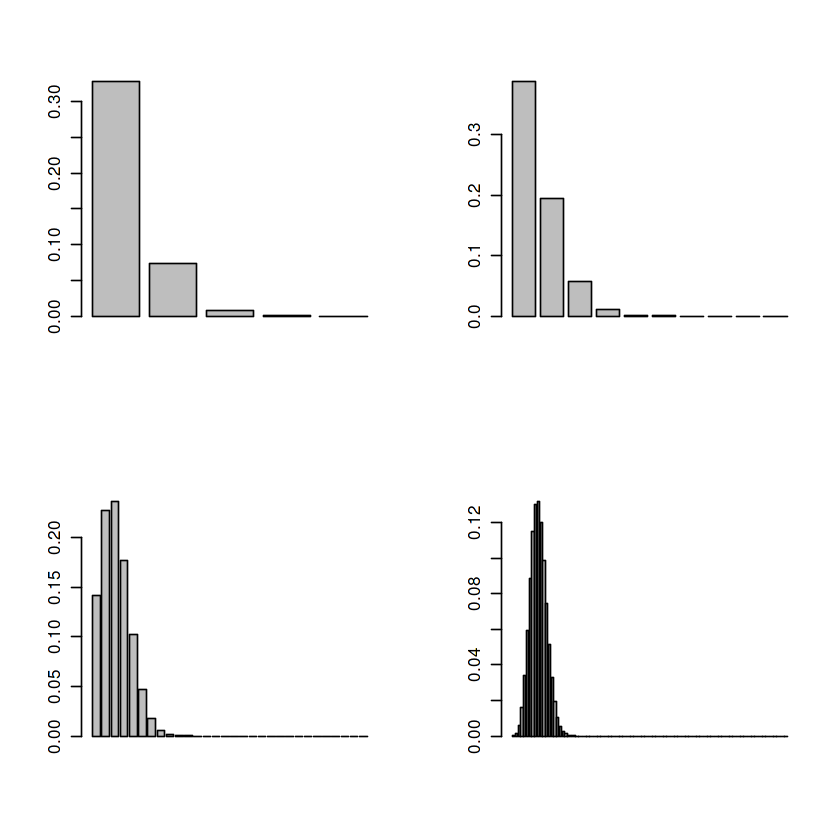

In [37]:
par(mfrow=c(2,2))
x2=1:5;barplot(dbinom(x2,length(x2), 0.1))
x2=1:10;barplot(dbinom(x2,length(x2), 0.1))
x2=1:30;barplot(dbinom(x2,length(x2), 0.1))
x2=1:100;barplot(dbinom(x2,length(x2), 0.1))

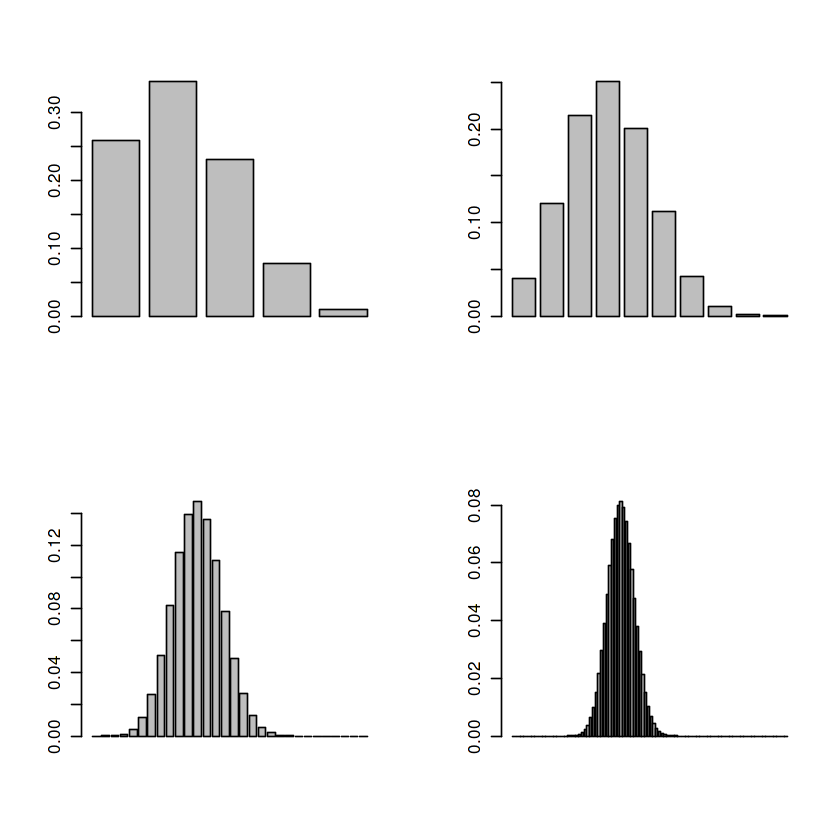

In [38]:
par(mfrow=c(2,2))
x2=1:5;barplot(dbinom(x2,length(x2), 0.4))
x2=1:10;barplot(dbinom(x2,length(x2), 0.4))
x2=1:30;barplot(dbinom(x2,length(x2), 0.4))
x2=1:100;barplot(dbinom(x2,length(x2), 0.4))

### 2. 지수분포와 중심극한정리

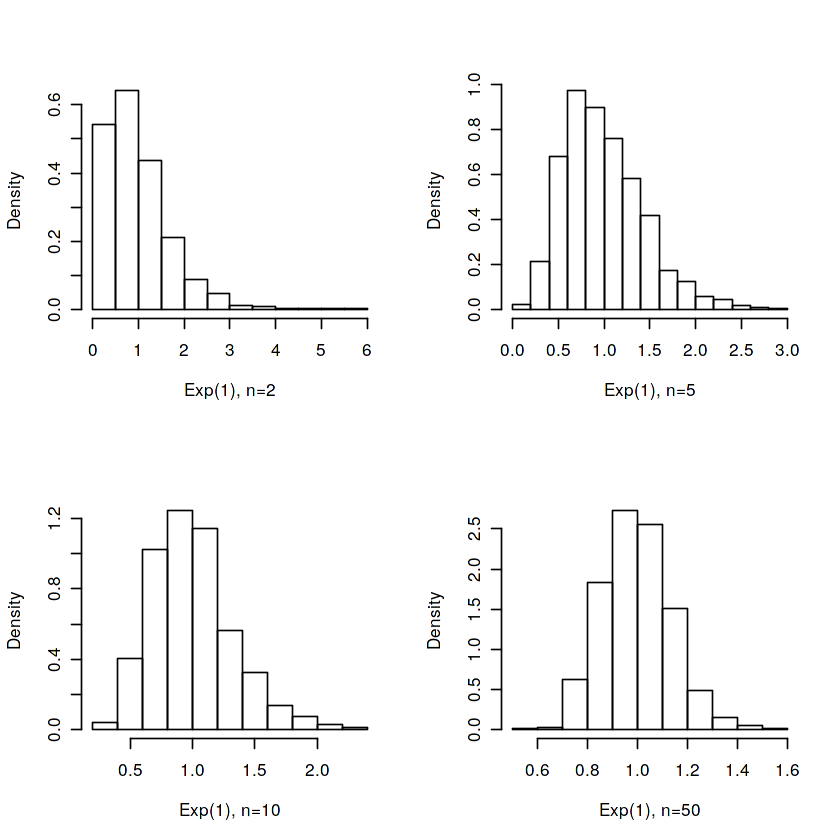

In [39]:
par(mfrow=c(2,2))
result = rep(0,1000)
for ( i in 1:1000 ){ result[i] = mean(rexp(2,1))} 
 hist(result,main="",prob=T, xlab="Exp(1), n=2")
for ( i in 1:1000 ){ result[i] = mean(rexp(5,1))} 
 hist(result,main="",prob=T, xlab="Exp(1), n=5")
for ( i in 1:1000 ){ result[i] = mean(rexp(10,1))}  
  hist(result,main="",prob=T, xlab="Exp(1), n=10")
for ( i in 1:1000 ){ result[i] = mean(rexp(50,1))} 
  hist(result,main="",prob=T, xlab="Exp(1), n=50")

### 3. 중심극한정리

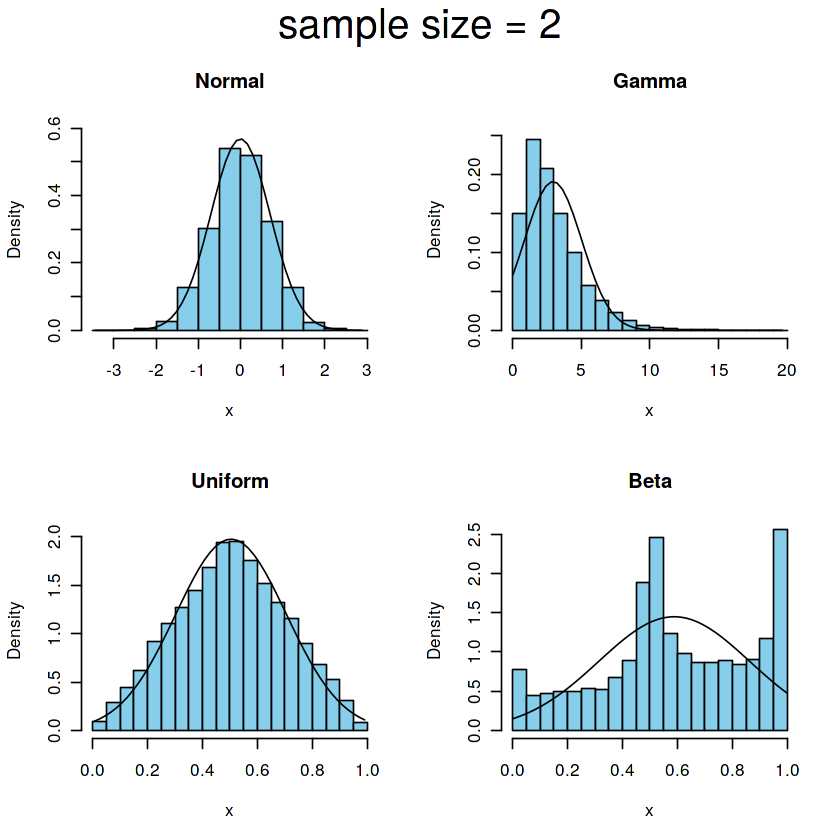

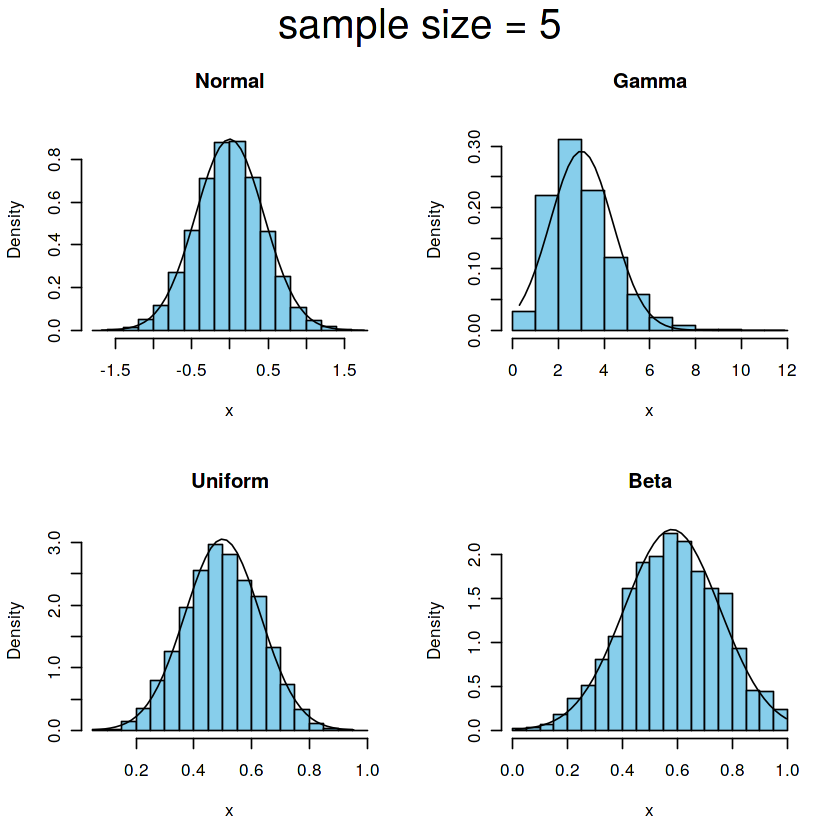

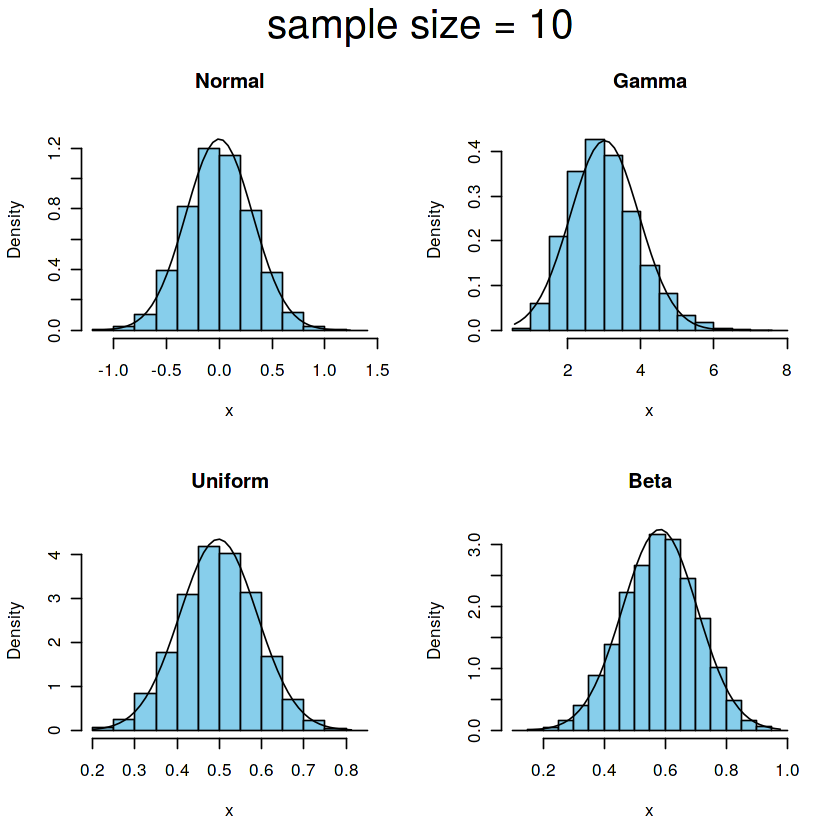

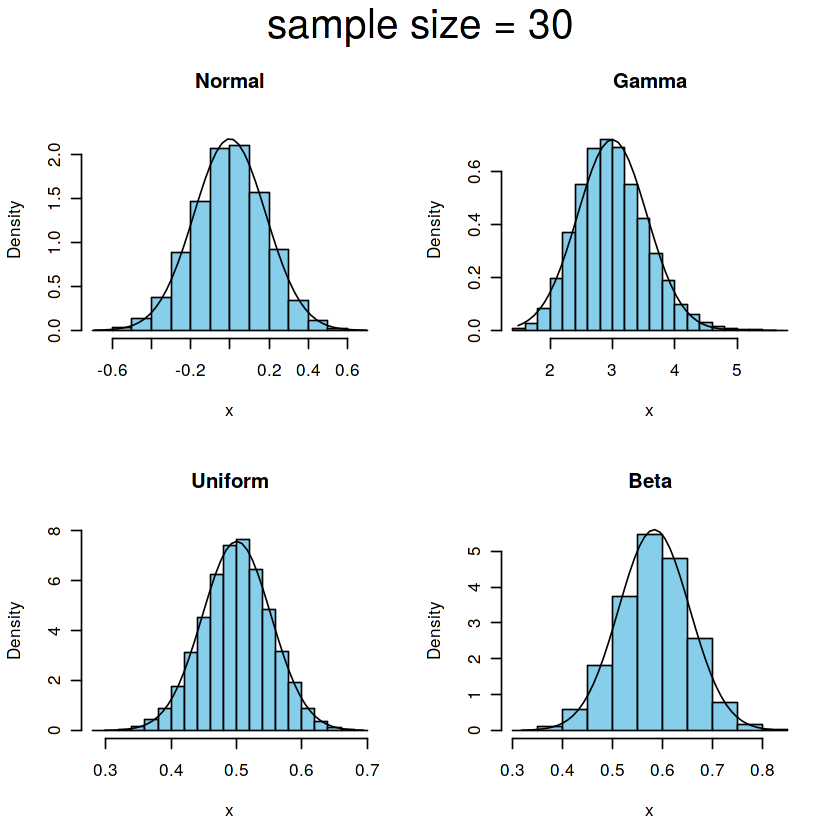

In [40]:
clt.examp(2) 
clt.examp(5)
clt.examp(10) 
clt.examp(30) 

## 제9장

In [41]:
# 전이확률 계산
P = matrix(c(0.4, 0.5, 0.6, 0.5), nrow=2)
P2 = P %*% P
P2

0.46,0.54
0.45,0.55


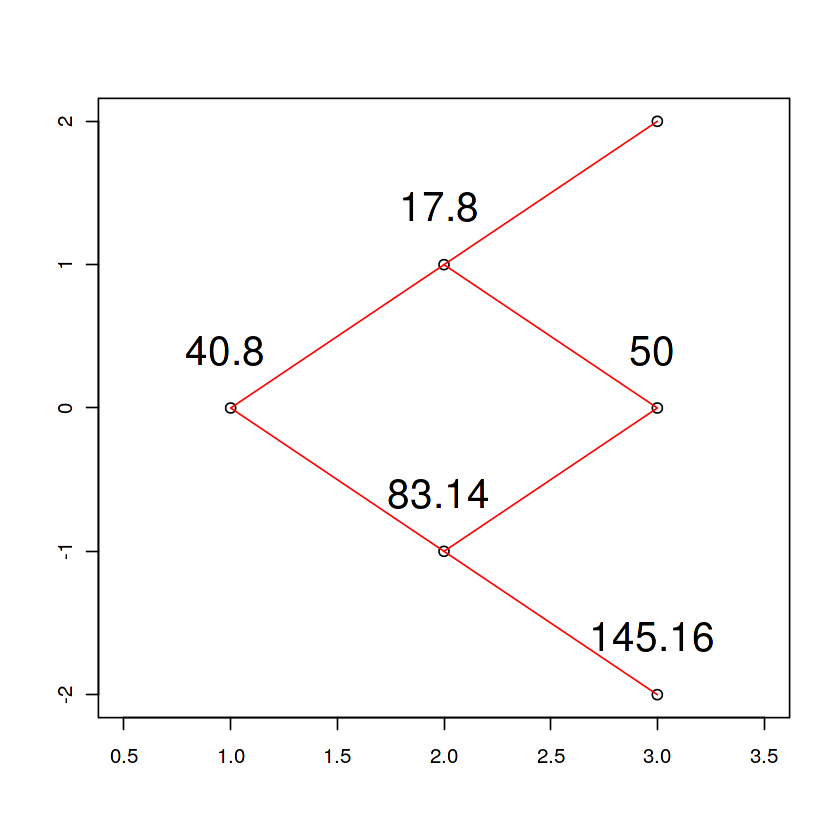

In [42]:
# 이항분포과정을 이용한 옵션의 가격
library(fOptions)
CRRTree = BinomialTreeOption(TypeFlag = "pe", S = 1000, X = 1050, Time = 0.5, r = 0.06, b = 0.06, sigma = 0.10, n = 2)
BinomialTreePlot(CRRTree, cex = 2, xlim=c(0.5,3.5), xlab = " ", ylab = " ")

## 제10장

### 1. 균등분포의 난수 생성

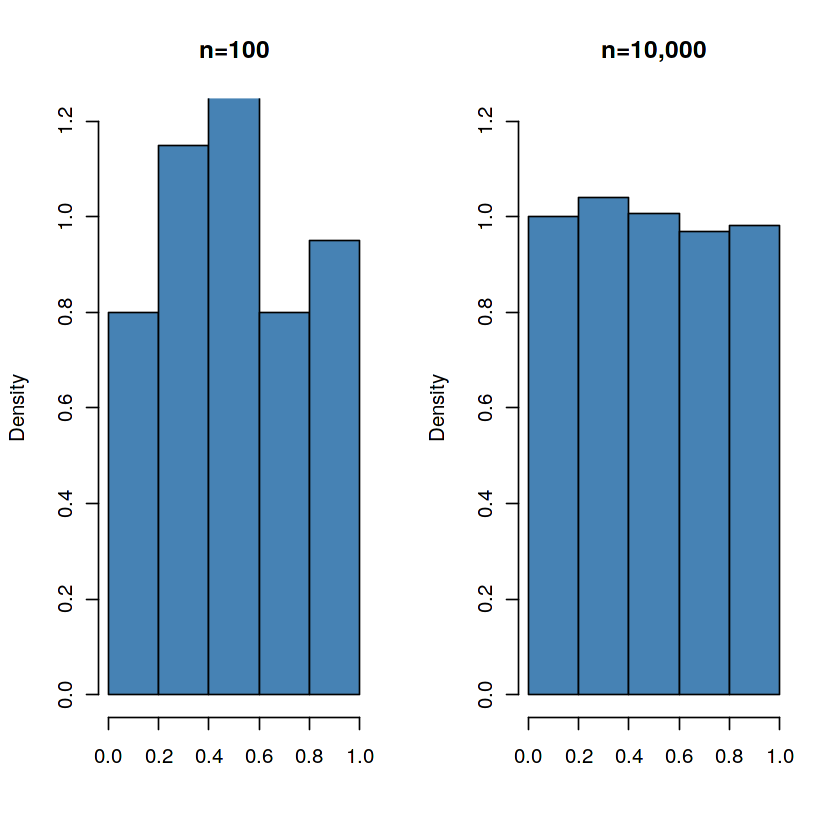

In [43]:
par(mfrow=c(1,2))
set.seed(1234567)
hist(runif(100), xlab="", main="n=100", freq =FALSE, ylim=c(0, 1.2), 
  breaks = c(0,0.2,0.4,0.6,0.8,1.0), col="steelblue")
hist(runif(10000), xlab="", main="n=10,000", freq =FALSE, ylim=c(0, 
  1.2), breaks = c(0,0.2,0.4,0.6,0.8,1.0), col="steelblue")

### 2. 지수분포 난수의 생성과 비교

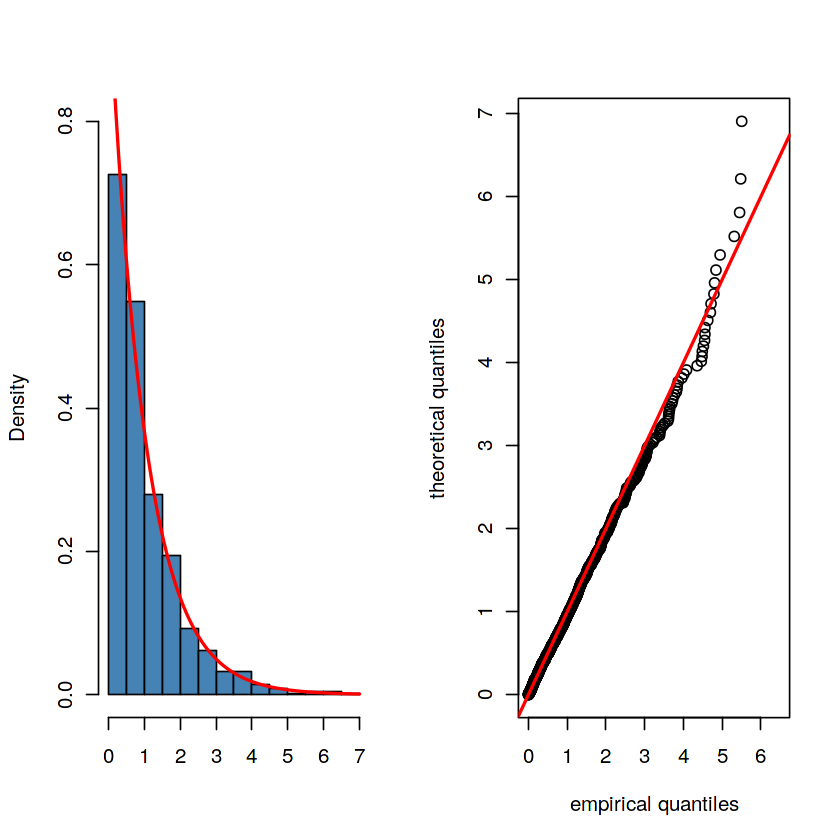

In [44]:
par(mfrow=c(1,2))
set.seed(1234567)
u1 = runif(1000)
e1 = -log(1-u1)
x1 = rexp(1000,1)
sq1 = sort(x1)
tq1 = function(u){-log(1-u)}
hist(e1, freq=FALSE, ylim=c(0, 0.8), xlab="", main="", col="steelblue")
 curve(dexp(x,1), xlim = c(0, 7), add=TRUE, col=2, lwd=2)
plot(sq1, tq1(1:1000/1000), ylab="theoretical quantiles", xlab="empirical quantiles")
 abline(a=0, b=1, col=2, lwd=2)

### 3. 카이제곱분포 난수의 생성과 비교

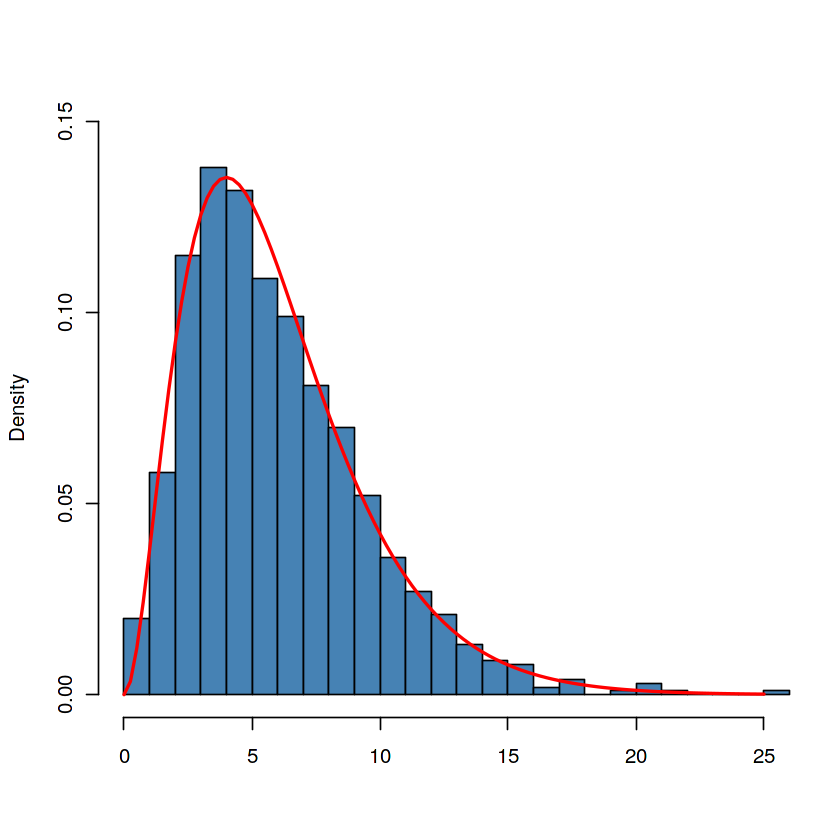

In [45]:
set.seed(1234567)
u1 = runif(3*1000)
u2 = matrix(data=u1,nrow=3) 
x1 = -log(1-u2)               # 지수분포 생성
x1 = 2*apply(x1,2,sum)        # 카이제곱분포
hist(x1, freq=FALSE, xlim=c(0,25), ylim=c(0,0.15), xlab="", main="", col="steelblue", breaks=20)
 curve(dchisq(x, df=6), add=TRUE, col=2, lwd=2)

### 4. 정규분포 난수의 생성과 비교

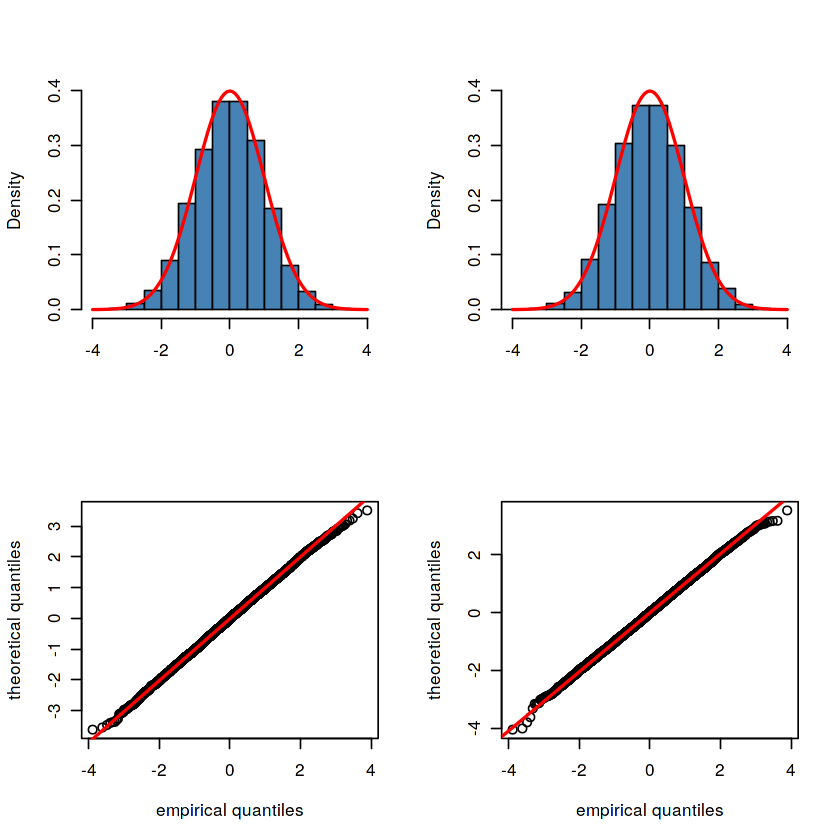

In [46]:
par(mfrow=c(2,2))
set.seed(1234567)
u1 = runif(10000)
u2 = runif(10000)
x1 = sqrt(-2*log(u1))*cos(2*pi*u2)
x2 = sqrt(-2*log(u1))*sin(2*pi*u2)

hist(x1, freq=FALSE, xlim=c(-4,4), breaks=20,ylim=c(0,0.4), xlab="",  main="", col="steelblue")
 curve(dnorm(x), add=TRUE, col=2, lwd=2)
hist(x2, freq=FALSE, xlim=c(-4,4), breaks=20,ylim=c(0,0.4), xlab="", main="", col="steelblue")
 curve(dnorm(x), add=TRUE, col=2, lwd=2)
qqnorm(x1, ylab="theoretical quantiles", xlab="empirical quantiles", main="" )
 qqline(x1, col=2, lwd=2 )
qqnorm(x2, ylab="theoretical quantiles", xlab="empirical quantiles", main="" )
 qqline(x2, col=2, lwd=2 )

### 5. 이항분포 난수의 생성

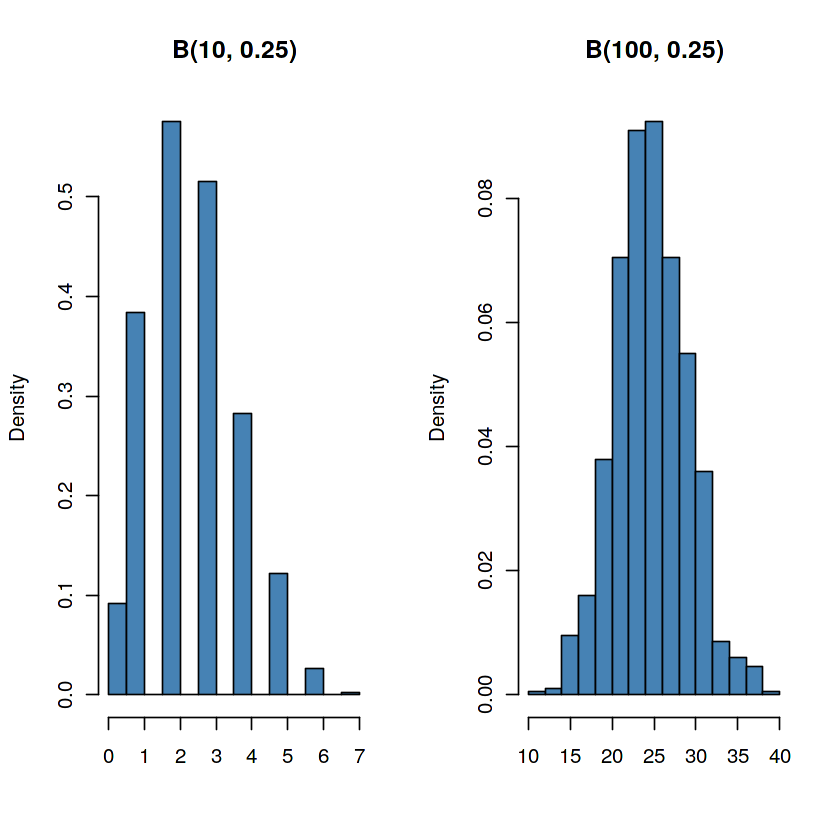

In [47]:
par(mfrow=c(1,2))
set.seed(1234567) 

# 이항분포 B(10, 0.25) 생성
bn1 = rep(0,1000)
for(i in 1:1000) {bn1[i] = sum(runif(10)<0.25)}
hist(bn1, freq=FALSE, xlab="", main="B(10, 0.25)", col="steelblue")

# 이항분포 B(100, 0.25) 생성
bn2 = rep(0,1000)
for(i in 1:1000) {bn2[i] = sum(runif(100)<0.25)}
hist(bn2, freq=FALSE, xlab="", main="B(100, 0.25)", col="steelblue")

### 6. 원주율 계산

In [48]:
set.seed(1234567) 
pical = function(n){
     u1 = runif(n, -10, 10)
     u2 = runif(n, -10, 10)
     x1 = rep(0,n)
     x1[u1^2 + u2^2 <= 100] = 1
     pi1 = mean(x1)*4
     return(pi1)
}
pical(100)  
pical(10000)  
pical(1000000)  

[1] 3.28

[1] 3.1668

[1] 3.139024

### 7. 함수 면적의 계산

0.25 with absolute error < 2.8e-15

[1] 0.28

[1] 0.249

0.3333334 with absolute error < 0.00012

[1] 0.32

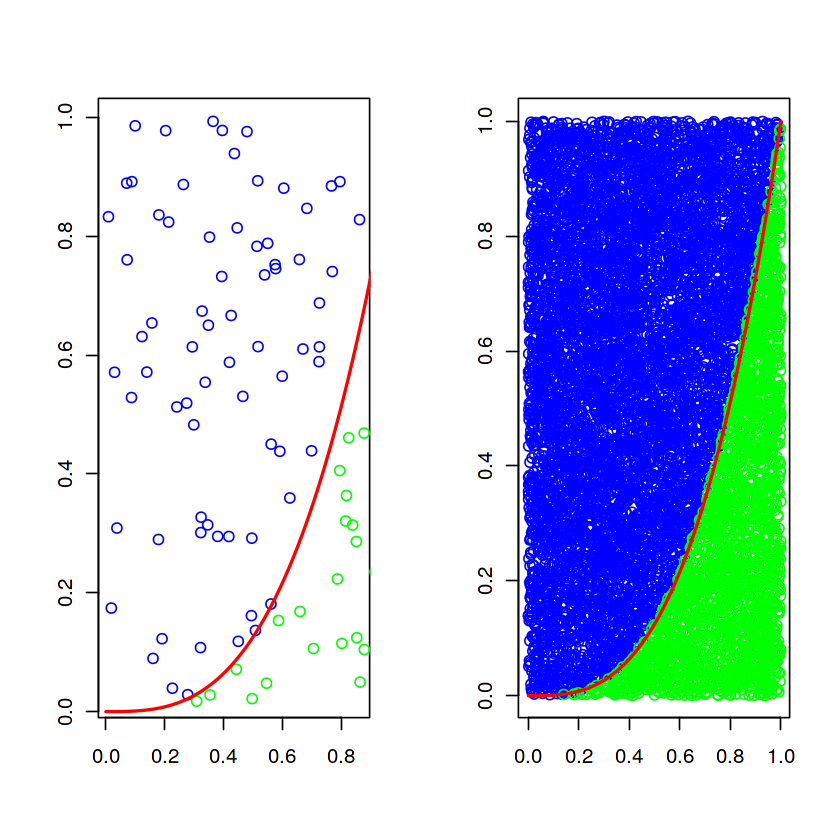

[1] 0.335

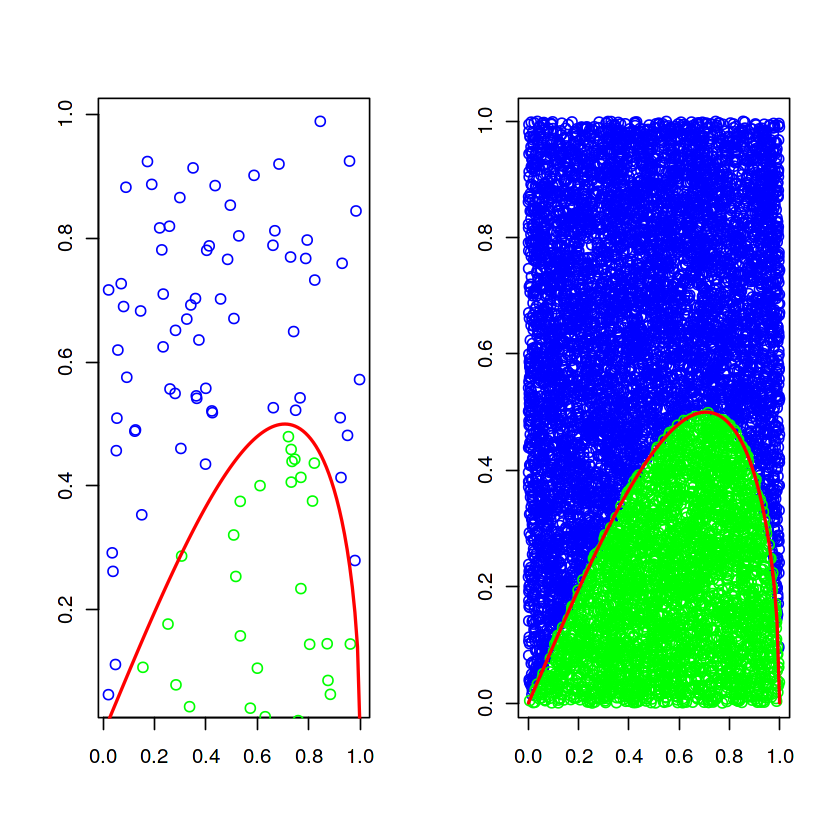

In [49]:
par(mfrow=c(1,2))
set.seed(1234567) 
 
rint = function(f,gg,n){
     sam = matrix(runif(2*n), ncol=2)
     qq = gg(sam[,1], sam[,2])
     
     plot(sam[!qq,1], sam[!qq,2], col='blue', pch=1, xlab="", ylab="")
     points(sam[qq,1], sam[qq,2], col='green', pch=1)
     curve(f, 0,1, n=100, col='red', add=TRUE, lwd=2)
     return(length(qq[qq]) / n)
 }
 
f1 = function(x) x^3
g1 = function(x,y) y <= x^3
 
f2 = function(x) sqrt(1-x^2)*x
g2 = function(x,y) y <= sqrt(1-x^2)*x
 
integrate(f1,0,1)
rint(f1, g1, 100)
rint(f1, g1, 10000)
integrate(f2,0,1)
rint(f2, g2, 100)
rint(f2, g2, 10000)

### 8. 정규분포의 기댓값과 분산의 계산

In [50]:
set.seed(1234567) 
x1 = rnorm(100)
x2 = rnorm(10000)
 
f1 = function(x) x*dnorm(x)
mu = integrate(f1, -Inf, Inf)
print(mu)

mean(x1)
mean(x2)
 
f2 = function(x) (x-mu$value)^2*dnorm(x)
sigma2 = integrate(f2, -Inf, Inf)
print(sigma2)
var(x1)
var(x2)

0 with absolute error < 0


[1] -0.0771234

[1] -0.009002444

1 with absolute error < 1.2e-07


[1] 0.9188922

[1] 0.9895978

### 9. 정규분포의 분산의 계산

In [51]:
set.seed(1234567) 
imports = function(n){
     x1 = rt(n,1)
     w1  = dnorm(x1)/dt(x1,1)
     return(mean(x1*x1*w1))
 }
 
imports(100)  
imports(10000)  

[1] 1.07454

[1] 0.9907632